## Data Preparation and Processing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Exmple data:
 - experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial.
 - The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.
 - around 95% of patients 65 or older experienced side effects from the drug
 - around 95% of patients under 65 experienced no side effects

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did exprience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not exprience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not exprience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did exprience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [4]:
print (train_labels) 
print (train_samples) 

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

convert both lists into numpy arrays due to what the fit() function expects, and then shuffle the arrays to remove any order that was imposed on the data during the creation process.

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels , train_samples = shuffle(train_labels, train_samples)

In [6]:
print (train_labels[:25]) 
print (train_samples[:25])

[0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1]
[16 32 78 80 40 77 87 97 65 24 84 13 97 20 72 81 38 71 67 93 35 66 63 30
 73]


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
print(scaled_train_samples[:10])

[[0.03448276]
 [0.2183908 ]
 [0.74712644]
 [0.77011494]
 [0.31034483]
 [0.73563218]
 [0.85057471]
 [0.96551724]
 [0.59770115]
 [0.12643678]]


## Simple tf.keras Sequential Model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

Epoch 1/30


210/210 - 3s - loss: 0.6645 - accuracy: 0.5381 - 3s/epoch - 15ms/step
Epoch 2/30
210/210 - 1s - loss: 0.6429 - accuracy: 0.6081 - 685ms/epoch - 3ms/step
Epoch 3/30
210/210 - 1s - loss: 0.6145 - accuracy: 0.7114 - 703ms/epoch - 3ms/step
Epoch 4/30
210/210 - 1s - loss: 0.5819 - accuracy: 0.7671 - 689ms/epoch - 3ms/step
Epoch 5/30
210/210 - 1s - loss: 0.5478 - accuracy: 0.8105 - 683ms/epoch - 3ms/step
Epoch 6/30
210/210 - 1s - loss: 0.5122 - accuracy: 0.8443 - 678ms/epoch - 3ms/step
Epoch 7/30
210/210 - 1s - loss: 0.4794 - accuracy: 0.8600 - 674ms/epoch - 3ms/step
Epoch 8/30
210/210 - 1s - loss: 0.4487 - accuracy: 0.8710 - 673ms/epoch - 3ms/step
Epoch 9/30
210/210 - 1s - loss: 0.4210 - accuracy: 0.8800 - 676ms/epoch - 3ms/step
Epoch 10/30
210/210 - 1s - loss: 0.3967 - accuracy: 0.8910 - 676ms/epoch - 3ms/step
Epoch 11/30
210/210 - 1s - loss: 0.3753 - accuracy: 0.8957 - 679ms/epoch - 3ms/step
Epoch 12/30
210/210 - 1s - loss: 0.3572 - accuracy: 0.8995 - 687ms/epoch - 3ms/step
E

In [14]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

Epoch 1/30
189/189 - 1s - loss: 0.2649 - accuracy: 0.9333 - val_loss: 0.2435 - val_accuracy: 0.9524 - 1s/epoch - 6ms/step
Epoch 2/30
189/189 - 1s - loss: 0.2639 - accuracy: 0.9339 - val_loss: 0.2434 - val_accuracy: 0.9571 - 773ms/epoch - 4ms/step
Epoch 3/30
189/189 - 1s - loss: 0.2630 - accuracy: 0.9370 - val_loss: 0.2423 - val_accuracy: 0.9524 - 759ms/epoch - 4ms/step
Epoch 4/30
189/189 - 1s - loss: 0.2620 - accuracy: 0.9360 - val_loss: 0.2403 - val_accuracy: 0.9524 - 753ms/epoch - 4ms/step
Epoch 5/30
189/189 - 1s - loss: 0.2616 - accuracy: 0.9360 - val_loss: 0.2405 - val_accuracy: 0.9524 - 744ms/epoch - 4ms/step
Epoch 6/30
189/189 - 1s - loss: 0.2604 - accuracy: 0.9339 - val_loss: 0.2409 - val_accuracy: 0.9571 - 754ms/epoch - 4ms/step
Epoch 7/30
189/189 - 1s - loss: 0.2599 - accuracy: 0.9392 - val_loss: 0.2407 - val_accuracy: 0.9571 - 765ms/epoch - 4ms/step
Epoch 8/30
189/189 - 1s - loss: 0.2592 - accuracy: 0.9365 - val_loss: 0.2386 - val_accuracy: 0.9524 - 754ms/epoch - 4ms/step
Epo

## Preprocess Test Data

In [15]:
test_labels = []
test_samples = []

In [16]:
for i in range(10):
    # The ~5% of younger individuals who did exprience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The ~5% of older individuals who did not exprience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not exprience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who did exprience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [17]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels , test_samples = shuffle( test_labels, test_samples)

In [18]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [19]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0 )

In [20]:
for  i in  predictions:
    print(i)

[0.9796513  0.02034871]
[0.97986645 0.02013361]
[0.97463053 0.02536942]
[0.20865105 0.791349  ]
[0.01843631 0.9815637 ]
[0.97986645 0.02013361]
[0.9796513  0.02034871]
[0.97986645 0.02013361]
[0.09524323 0.9047568 ]
[0.92491    0.07509007]
[0.91363585 0.08636419]
[0.04257301 0.957427  ]
[0.97986645 0.02013361]
[0.4213406 0.5786594]
[0.02149648 0.9785035 ]
[0.07682654 0.9231735 ]
[0.07682654 0.9231735 ]
[0.20865105 0.791349  ]
[0.84739757 0.15260245]
[0.05325223 0.94674784]
[0.10962849 0.89037156]
[0.97463053 0.02536942]
[0.66786194 0.332138  ]
[0.01843631 0.9815637 ]
[0.03395862 0.9660414 ]
[0.5725368 0.4274632]
[0.07682654 0.9231735 ]
[0.04257301 0.957427  ]
[0.9786925  0.02130749]
[0.04588335 0.95411664]
[0.9796169  0.02038313]
[0.03949164 0.9605083 ]
[0.4715029  0.52849716]
[0.97819954 0.02180046]
[0.84739757 0.15260245]
[0.97975427 0.02024575]
[0.6213706  0.37862936]
[0.02149648 0.9785035 ]
[0.5222475 0.4777525]
[0.4715029  0.52849716]
[0.956003   0.04399703]
[0.01990888 0.98009115

In [21]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

0
0
0
1
1
0
0
0
1
0
0
1
0
1
1
1
1
1
0
1
1
0
0
1
1
0
1
1
0
1
0
1
1
0
0
0
0
1
0
1
0
1
1
1
1
1
0
1
1
0
0
1
1
1
0
0
1
0
0
1
0
1
1
1
0
1
1
0
0
1
0
1
1
1
0
1
1
0
1
0
0
0
1
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
0
0
0
1
1
0
1
1
1
1
0
0
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
1
0
0
0
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
1
1
0
0
0
1
1
1
0
1
0
1
0
1
1
1
0
0
0
1
0
1
0
1
0
0
0
1
0
1
0
1
0
0
0
1
0
1
0
0
0
1
0
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
1
1
1
1
1
0
1
0
0
0
1
0
1
0
1
0
0
1
0
0
1
1
1
0
0
1
1
1
1
1
0
0
0
0
0
1
1
0
1
1
0
1
1
1
1
1
1
0
0
1
0
0
0
1
1
0
0
1
1
1
0
0
1
0
1
1
1
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
1
0
1
1
1
1
1
1
0
1
1
1
0
1
0
0
0
1
0
1
0
1
0
1
1
1
1
1
1
1
0
1
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
1
1
1
1
1
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
1
1
1
1
1
1
1
1
0
0
0
1
1
0
1
1


## Confusion Matrix

In [22]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [23]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [24]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[197  13]
 [ 10 200]]


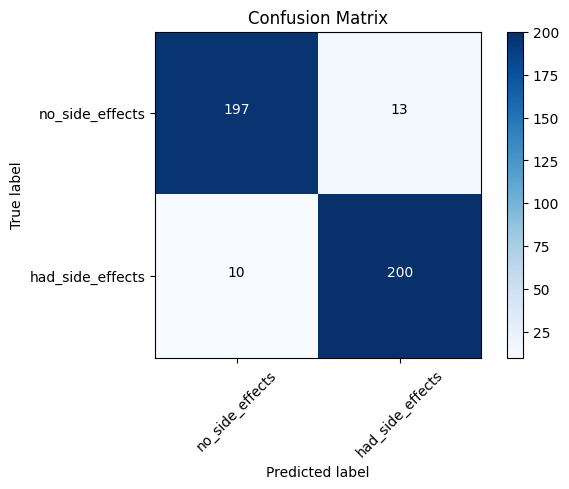

In [25]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Save and Load a Model

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 1.model.save()

In [28]:
# check if the model already exists.
import os.path
if os.path.isfile('../models/medical_trail_model.h5') is False:
    model.save('../models/medical_trail_model.h5')

c:\Users\ASUS\Desktop\Music AI\Python-Deep-Learning-and-Neural-Networks\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


This method of saving will save everything about the model:
- The architecture 
- The weights 
- The optimizer 
- The state of the optimizer
- The learning rate
- The loss, etc.

In [30]:
from tensorflow.keras.models import load_model
new_model = load_model('../models/medical_trail_model.h5')

In [31]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
new_model.get_weights()

[array([[-0.2624589 , -0.15449178, -0.4838206 ,  0.677867  ,  0.7368161 ,
         -0.5286893 , -0.10158318, -0.13186592, -0.04127103, -0.2583177 ,
          0.21722938,  0.7301822 , -0.35878918,  0.21325581, -0.06052452,
          0.6104064 ]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , -0.19349188, -0.22505692,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.10211137, -0.17042987,  0.        , -0.10219288,  0.        ,
        -0.06815875], dtype=float32),
 array([[-0.16022494, -0.34706175, -0.09913218, -0.21349183, -0.24131018,
          0.18445292, -0.06679887,  0.12712121, -0.11988047,  0.05413064,
         -0.16363598, -0.18933207,  0.170504  , -0.14844465,  0.06810862,
         -0.13982646,  0.00195047,  0.09592208, -0.01389852, -0.32176033,
          0.23302177, -0.01143283,  0.29834202,  0.13666588,  0.10934368,
          0.3115792 , -0.06920666,  0.23170713,  0.13101643,  0.06353158,
          0.1864042 ,  0.15682974],
 

In [34]:
new_model.optimizer